In [1]:
import tkinter as tk
from tkinter import filedialog
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

import json


✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251002 exp#142 HHC Al 5T #173 driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC/Stanton_all.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#143 HHC Al 5T #174 driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC porous/Stanton_all.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#144 HHC Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Stanton_all.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#145 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Stanton_all.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#146 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC/Stanton_all.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci

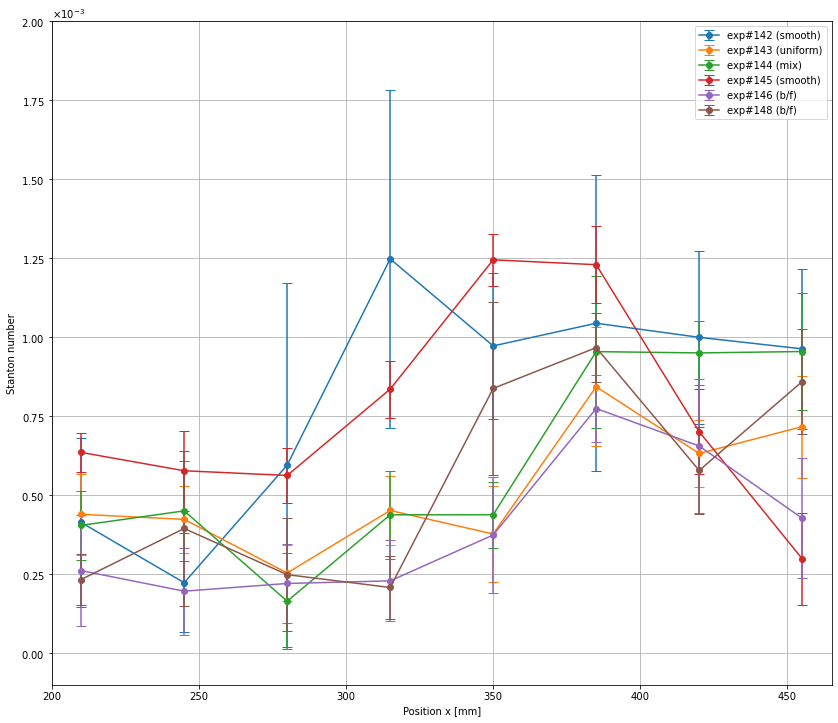

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# 실험 폴더 리스트
experiment_folders = [
    '251002 exp#142 HHC Al 5T #173 driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC',
    '251003 exp#143 HHC Al 5T #174 driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC porous',
    '251003 exp#144 HHC Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '251003 exp#145 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '251003 exp#146 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC',
    '251028 exp#148 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    # '250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    # '250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    # '250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250729 exp#135 half half cone non-uniform 2 PET150 x23 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    # '250917 exp#141 HHC Al 5T #173  driven 0.2barg He M6.8 2.5MHz FL200 TC'
]
# 실험 번호 → 시간 범위 매핑
# # 실험 번호 → 시간 범위 매핑
time_ranges = {
    142: (2.4, 2.9),
    143: (1.7, 2.2),
    144: (1.1, 1.6),
    145: (3.2, 3.7),
    146: (1.1, 1.6),
    148: (1.1, 1.6),
    149: (1.1, 1.6),
    # 128: (2.3, 3.3),
    # 129: (1.8, 2.8),
    # 130: (7.4, 8.4),
    # 131: (9.2, 10.2),
    # 132: (9.2, 10.2),
    # 133: (11.4, 11.5), 
    # 134: (10, 11),
    # 135: (9.9, 10.9),
    # 141: (2.8, 3.8),
}

# 실험 번호별 legend 라벨 지정
legend_labels = {
    142: "exp#142 (smooth)",
    143: "exp#143 (uniform)",
    144: "exp#144 (mix)",
    145: "exp#145 (smooth)",
    146: "exp#146 (b/f)",
    148: "exp#148 (b/f)",
    # 128: "exp#128 (smooth)",
    # 129: "exp#129 (smooth)",
    # 130: "exp#130 (porous uniform)",
    # 131: "exp#131 (porous uniform)",
    # 132: "exp#132 (porous uniform)",
    # 133: "exp#133 (porous non-uniform 2)",
    # 134: "exp#134 (porous non-uniform 2)",
    # 135: "exp#135 (smooth)",
    # 141: "exp#141 (smooth)",
}

# 체크리스트 파일 경로
checklist_path = "/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/SHyST Exp Check List ver1.xlsx"
checklist_data = pd.read_excel(checklist_path, header=2)

# Stanton 수 분모 계산 함수
def st_denom(rho7, a7, T7, Tw=273.15):
    rho_e = rho7 * 1.74428290
    u_e = (a7 * (1.25341069 ** 0.5)) * 5.95162128
    c_p = 1022.08
    T_r = T7 * 1.25341069 * (1 + 0.83 * (0.39/2) * 5.95162128**2)
    return rho_e * u_e * c_p * (T_r - Tw)

# 플롯 설정
plt.figure(figsize=(12, 10))

for folder_name in experiment_folders:
    folder_path = os.path.join(
        '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci',
        folder_name
    )
    heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

    exp_num = int(folder_name.split("exp#")[1].split()[0])
    start_ms, end_ms = time_ranges[exp_num]

    df_q = pd.read_csv(heatflux_file, sep="\t")
    df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

    positions, means, stds = [], [], []
    for col in df_q_range.columns[1:]:
        pos = col.split("@")[1].replace("mm", "")
        q_values = df_q_range[col]
        positions.append(int(pos))
        means.append(q_values.mean())
        stds.append(q_values.std())

    sorted_data = sorted(zip(positions, means, stds))
    positions, means, stds = zip(*sorted_data)

    row = checklist_data[checklist_data['#'] == exp_num]
    if row.empty:
        print(f"[경고] 실험 #{exp_num} 체크리스트에서 찾을 수 없음.")
        continue

    rho7 = row.iloc[0]['Stage 7 rho (kg/m**3)']
    a7 = row.iloc[0]['Stage 7 a (m/s)']
    T7 = row.iloc[0]['Stage 7 T (K)']
    denom = st_denom(rho7, a7, T7)

    stanton = [q / denom for q in means]
    stanton_std = [s / denom for s in stds]

    plt.errorbar(
        positions, stanton, yerr=stanton_std, fmt='o-', capsize=5,
        label=legend_labels.get(exp_num, f"exp#{exp_num}")
    )

# 공통 그래프 설정
plt.xlabel("Position x [mm]")
plt.ylabel("Stanton number")
plt.xlim(200, 465)
plt.ylim(-0.0001, 0.0020)
plt.grid(True)
plt.legend()
plt.tight_layout()

# y축 10^-3으로 표시
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

# 모든 폴더에 Stanton.pdf 저장
for folder_name in experiment_folders:
    folder_path = os.path.join(
        '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci',
        folder_name
    )
    save_path = os.path.join(folder_path, "Stanton_all.pdf")
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {save_path}")

plt.show()


151086387.73994935
144938434.83469602
146560545.69042438
146379444.69710907
156511109.90619245
152396660.63107464
137747954.46846816
129985644.6685798
143831121.16691905
134174582.72485039
136558544.67172092
134443420.53923035
136114094.82668585
135814497.88117477
152208015.24210906
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251002 exp#142 HHC Al 5T #173 driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#143 HHC Al 5T #174 driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#144 HHC Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#145 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/St_g

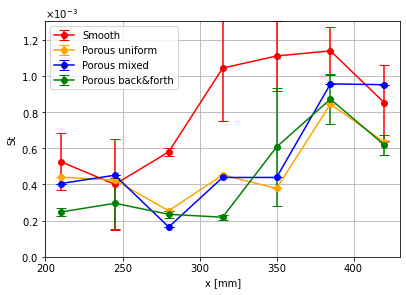

✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251002 exp#142 HHC Al 5T #173 driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#143 HHC Al 5T #174 driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC porous/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#144 HHC Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#145 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251003 exp#146 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labvi

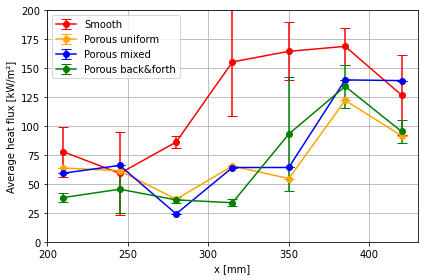

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# ===== 경로/입력 =====
base_dir = '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci'
# 실험 폴더 리스트
# 실험 폴더 리스트
experiment_folders = [
    '251002 exp#142 HHC Al 5T #173 driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC',
    '251003 exp#143 HHC Al 5T #174 driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC porous',
    '251003 exp#144 HHC Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '251003 exp#145 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '251003 exp#146 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 300-450 TC',
    '251028 exp#148 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC',
    '250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250729 exp#135 half half cone non-uniform 2 PET150 x23 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250917 exp#141 HHC Al 5T #173  driven 0.2barg He M6.8 2.5MHz FL200 TC'
]
# 실험 번호 → 시간 범위 매핑
# # 실험 번호 → 시간 범위 매핑
time_ranges = {
    142: (2.4, 2.9),
    143: (1.7, 2.2),
    144: (1.1, 1.6),
    145: (3.2, 3.7),
    146: (1.1, 1.6),
    148: (1.1, 1.6),
    128: (2.3, 3.3),
    129: (1.8, 2.8),
    130: (7.4, 8.4),
    131: (9.2, 10.2),
    132: (9.2, 10.2),
    133: (11.4, 11.5), 
    134: (10, 11),
    135: (9.9, 10.9),
    141: (2.8, 3.8),
}



checklist_path = "/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/SHyST Exp Check List ver1.xlsx"
checklist_data = pd.read_excel(checklist_path, header=2)

# ===== 그룹/라벨 =====
## all
# groups = {
#     "Smooth": [128, 129, 135, 141, 142, 145], #135
#     "Porous uniform": [130, 131, 132, 143],
#     "Porous mixed": [133, 134, 144],
#     "Porous back&forth": [146],
# }

## past
# groups = {
#     "Smooth": [128, 129, 135, 141], #135
#     "Porous uniform": [130, 131, 132],
#     "Porous mixed": [133, 134],
#     "Porous back&forth": [],
# }

#new
groups = {
    "Smooth": [142, 145], #135
    "Porous uniform": [143],
    "Porous mixed": [144],
    "Porous back&forth": [146,148],
}
exclude_exps = {} #132, 135, 141

# ===== 그룹별 색상 =====
group_colors = {
    "Smooth": "red",
    "Porous uniform": "orange",
    "Porous mixed": "blue",
    "Porous back&forth": "green"
}

# ===== Stanton 분모 =====
# ===== Stanton 분모 =====
def st_denom(rho7, a7, T7, Tw=273.15,
             gamma=1.39,
             Te_over_T1=1.25341069,
             rhoe_over_rho1=1.74428290,
             Me=5.95162128,
             r=0.83,
             cp_const=1022.08,
             verbose=False,
             tag=""):
    # edge values from Stage-7 (free stream) using conical-shock ratios
    rho_e = rho7 * rhoe_over_rho1
    a_e   = a7 * (Te_over_T1 ** 0.5)
    u_e   = Me * a_e
    T_e   = T7 * Te_over_T1

    # recovery temperature
    A     = 0.5 * (gamma - 1.0) * (Me ** 2)
    T_r   = T_e * (1.0 + r * A)

    # denominator
    cp    = cp_const
    denom = rho_e * u_e * cp * (T_r - Tw)

    if verbose:
        print(f"\n[DEBUG {tag}]")
        print(f"rho7={rho7:.6e}, a7={a7:.2f}, T7={T7:.2f}, Tw={Tw:.2f}")
        print(f"ratios: Te/T1={Te_over_T1:.8f}, rhoe/rho1={rhoe_over_rho1:.8f}, Me={Me:.6f}, gamma={gamma:.5f}, r={r:.2f}")
        print(f"edge:   rho_e={rho_e:.6e}, a_e={a_e:.2f}, u_e={u_e:.2f}, T_e={T_e:.2f}")
        print(f"Tr term A=((γ-1)/2)Me^2={A:.6f}  -> T_r={T_r:.2f}  (Tr-Tw)={T_r-Tw:.2f}")
        print(f"cp={cp:.2f}  denom=rho_e*u_e*cp*(Tr-Tw)={denom:.6e} W/m^2")
    print(denom)
    return denom


def expnum_from_folder(name: str) -> int:
    return int(name.split("exp#")[1].split()[0])

# ===== 한 실험의 (x, q_mean[W/m^2], St_mean) 취득. x=455 제외 =====
def load_q_and_st_vs_x(folder_name: str):
    exp_num = expnum_from_folder(folder_name)
    if exp_num in exclude_exps:
        return None

    folder_path = os.path.join(base_dir, folder_name)
    heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")
    start_ms, end_ms = time_ranges[exp_num]

    df_q = pd.read_csv(heatflux_file, sep="\t")
    df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

    row = checklist_data[checklist_data['#'] == exp_num]
    if row.empty:
        raise RuntimeError(f"[경고] 실험 #{exp_num} 체크리스트에서 찾을 수 없음.")
    rho7 = row.iloc[0]['Stage 7 rho (kg/m**3)']
    a7  = row.iloc[0]['Stage 7 a (m/s)']
    T7  = row.iloc[0]['Stage 7 T (K)']
    denom = st_denom(rho7, a7, T7)

    xs, q_means, st_means = [], [], []
    for col in df_q_range.columns[1:]:
        pos = int(col.split("@")[1].replace("mm", ""))
        if pos == 455:
            continue
        q_mean = df_q_range[col].mean()            # [W/m^2]
        st_mean = q_mean / denom
        xs.append(pos)
        q_means.append(q_mean)
        st_means.append(st_mean)

    xs, q_means, st_means = zip(*sorted(zip(xs, q_means, st_means)))
    return list(xs), list(q_means), list(st_means)

# ===== 모든 실험 로드 =====
per_exp_q = {}
per_exp_st = {}
for folder in experiment_folders:
    res = load_q_and_st_vs_x(folder)
    if res is None:
        continue
    exp_num = expnum_from_folder(folder)
    xs, q_means, st_means = res
    per_exp_q[exp_num]  = dict(zip(xs, q_means))
    per_exp_st[exp_num] = dict(zip(xs, st_means))

# ===== 그룹별 평균/표준편차(실험 간): 존재하는 데이터만 평균 =====
def group_curve(per_exp_dict, exp_list):
    exp_list = [e for e in exp_list if e in per_exp_dict]
    if not exp_list:
        return [], [], []

    # 교집합 대신 "합집합" 사용 → 위치별로 존재하는 값만 수집/평균
    all_positions = sorted(set().union(*[set(per_exp_dict[e].keys()) for e in exp_list]))
    positions, means, stds = [], [], []
    for x in all_positions:
        vals = [per_exp_dict[e][x] for e in exp_list if x in per_exp_dict[e]]
        if len(vals) == 0:
            continue
        positions.append(x)
        arr = np.array(vals, dtype=float)
        means.append(arr.mean())
        stds.append(arr.std(ddof=1) if len(arr) > 1 else 0.0)
    return positions, means, stds

group_st = {}
group_q  = {}
for gname, elist in groups.items():
    xs_st, ys_st, st_err = group_curve(per_exp_st, elist)
    xs_q,  ys_q,  q_err  = group_curve(per_exp_q, elist)
    group_st[gname] = (xs_st, ys_st, st_err)
    group_q[gname]  = (xs_q,  [v/1000.0 for v in ys_q], [e/1000.0 for e in q_err])  # kW/m^2

# ===== Plot 1: St =====
plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_st.items():
    if xs:
        plt.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))
plt.xlabel("x [mm]")
plt.ylabel("St")
plt.xlim(200, 430)
plt.ylim(0, 0.0013)
plt.grid(True)
plt.legend()
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

outfile_st = "St_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_st)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()

# ===== Plot 2: Average heat flux [kW/m^2] =====
plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_q.items():
    if xs:
        plt.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))
plt.xlabel("x [mm]")
plt.ylabel("Average heat flux [kW/m²]")
plt.xlim(200, 430)
plt.ylim(0, 200)
plt.grid(True)
plt.legend()
plt.tight_layout()

outfile_q = "HeatFlux_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_q)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()
